In [1]:
#import necessary libraries

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(2)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from pathlib import Path
import h5py
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import itertools

In [2]:
from PIL import Image
import os
from pylab import *
import re
from PIL import Image, ImageChops, ImageEnhance
import tensorflow as tf
from tensorflow.keras.utils import Sequence
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [3]:
print(tf.__version__)
import keras
print(keras.__version__)
from tensorflow.keras.layers import BatchNormalization

2.12.0
2.12.0


In [4]:
def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpg'
    ela_filename = 'temp_ela.png'
    
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)
    
    ela_image = ImageChops.difference(image, temp_image)
    
    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    
    return ela_image

In [5]:
image_size = (128, 128)

In [6]:
def prepare_image(image_path):
    return np.array(convert_to_ela_image(image_path, 90).resize(image_size)).flatten() / 255.0

In [7]:
X = [] # ELA converted images
Y = [] # 0 for fake, 1 for real

In [8]:
import random
path = 'new-dataset/real/'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith('jpg') or filename.endswith('png'):
            full_path = os.path.join(dirname, filename)
            X.append(prepare_image(full_path))
            Y.append(1)
            if len(Y) % 500 == 0:
                print(f'Processing {len(Y)} images')

#random.shuffle(X)
#X = X[:2100]
#Y = Y[:2100]
print(len(X), len(Y))

Processing 500 images
Processing 1000 images
Processing 1500 images
Processing 2000 images
Processing 2500 images
Processing 3000 images
Processing 3500 images
Processing 4000 images
Processing 4500 images
Processing 5000 images
Processing 5500 images
Processing 6000 images
Processing 6500 images
Processing 7000 images
Processing 7500 images
Processing 8000 images


/opt/anaconda3/envs/deepfake/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Processing 8500 images
Processing 9000 images
Processing 9500 images
Processing 10000 images
Processing 10500 images
Processing 11000 images
Processing 11500 images
Processing 12000 images
Processing 12500 images
Processing 13000 images
Processing 13500 images
Processing 14000 images
Processing 14500 images
Processing 15000 images
Processing 15500 images
Processing 16000 images
Processing 16500 images
Processing 17000 images
Processing 17500 images
Processing 18000 images
Processing 18500 images
Processing 19000 images
Processing 19500 images
19703 19703


In [9]:
path = 'new-dataset/fake/'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith('jpg') or filename.endswith('png'):
            full_path = os.path.join(dirname, filename)
            X.append(prepare_image(full_path))
            Y.append(0)
            if len(Y) % 500 == 0:
                print(f'Processing {len(Y)} images')

print(len(X), len(Y))

Processing 20000 images
Processing 20500 images
Processing 21000 images
Processing 21500 images
Processing 22000 images
Processing 22500 images
Processing 23000 images
Processing 23500 images
Processing 24000 images
Processing 24500 images
Processing 25000 images
Processing 25500 images
Processing 26000 images
Processing 26500 images
Processing 27000 images
Processing 27500 images
Processing 28000 images
Processing 28500 images
Processing 29000 images
Processing 29500 images
Processing 30000 images
Processing 30500 images
Processing 31000 images
Processing 31500 images
Processing 32000 images
Processing 32500 images
Processing 33000 images
Processing 33500 images
Processing 34000 images
Processing 34500 images
Processing 35000 images
Processing 35500 images
Processing 36000 images
Processing 36500 images
Processing 37000 images
Processing 37500 images
Processing 38000 images
Processing 38500 images
38833 38833


In [10]:
X = np.array(X)
Y = to_categorical(Y, 2)
X = X.reshape(-1, 128, 128, 3)

In [11]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state = 5)
X = X.reshape(-1, 1, 1, 1)
print(len(X_train), len(Y_train))
print(len(X_val), len(Y_val))

31066 31066
7767 7767


In [16]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
"""
    Propsoed CNN architecture.
    
"""

model = Sequential()

# Pamameters Initialization
input_shape = (128,128,3)
activation = 'relu'
padding = 'same'
droprate = 0.1
epsilon = 0.001

model = Sequential()
model.add(BatchNormalization(input_shape=input_shape))
model.add(Conv2D(filters=16, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))


model.add(Conv2D(filters=32, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters=64, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters =128, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters=256, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters=512, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(GlobalAveragePooling2D())
#model.add(Flatten())
#model.add(Dense(256, kernel_initializer='glorot_normal', activation='relu'))
#model.add(Dropout(0.5))
          
#model.add(Dense(128, kernel_initializer='glorot_normal', activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dropout(droprate))
model.add(Dense(2, activation='softmax'))

model.summary() # Summary of the architecture

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_7 (Batc  (None, 128, 128, 3)      12        
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 batch_normalization_8 (Batc  (None, 64, 64, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 32)        4640      
                                                      

In [17]:
epochs = 20
batch_size = 32
init_lr = 1e-4
optimizer = Adam(learning_rate = init_lr, decay = init_lr/epochs)

In [18]:
model.compile(loss='binary_crossentropy',optimizer=optimizer, metrics=['accuracy'])

In [19]:
hist = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, validation_data= (X_val, Y_val))

Epoch 1/20
971/971 [==============================] - 172s 176ms/step - loss: 0.4884 - accuracy: 0.7674 - val_loss: 0.4367 - val_accuracy: 0.7900
Epoch 2/20
971/971 [==============================] - 153s 158ms/step - loss: 0.4205 - accuracy: 0.8004 - val_loss: 0.4012 - val_accuracy: 0.8107
Epoch 3/20
971/971 [==============================] - 155s 160ms/step - loss: 0.3924 - accuracy: 0.8136 - val_loss: 0.3969 - val_accuracy: 0.8044
Epoch 4/20
971/971 [==============================] - 156s 160ms/step - loss: 0.3683 - accuracy: 0.8282 - val_loss: 0.3664 - val_accuracy: 0.8272
Epoch 5/20
971/971 [==============================] - 156s 161ms/step - loss: 0.3454 - accuracy: 0.8403 - val_loss: 0.3777 - val_accuracy: 0.8282
Epoch 6/20
971/971 [==============================] - 156s 161ms/step - loss: 0.3261 - accuracy: 0.8487 - val_loss: 0.3405 - val_accuracy: 0.8376
Epoch 7/20
971/971 [==============================] - 156s 160ms/step - loss: 0.3042 - accuracy: 0.8608 - val_loss: 0.3589 -

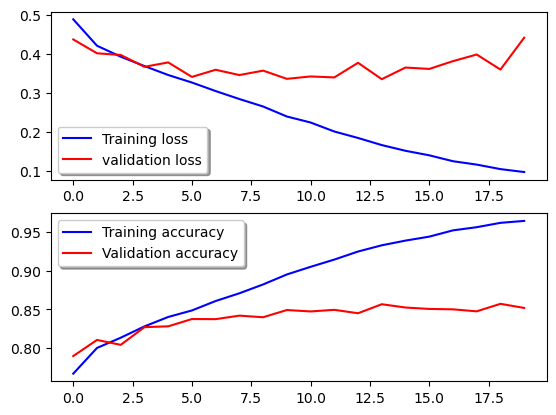

In [20]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['loss'], color='b', label="Training loss")
ax[0].plot(hist.history['val_loss'], color='r', label="validation loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

243/243 [==============================] - 9s 37ms/step


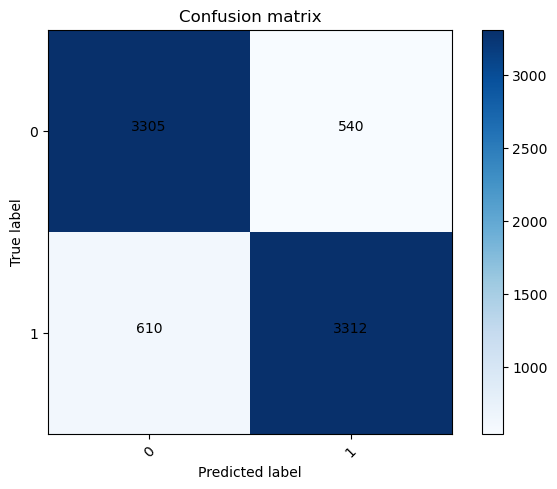

In [22]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))

In [23]:
# model performance
score = model.evaluate(x= X_val, y= Y_val, batch_size=32)
acc = score[1]
err = 1 - acc
print("Loss Value : ", score[0])
print("Accuracy : ", score[1])

243/243 [==============================] - 9s 38ms/step - loss: 0.4412 - accuracy: 0.8519
Loss Value :  0.44119322299957275
Accuracy :  0.8519377112388611


In [24]:
model_structure = model.to_json()
f = Path("models/model_structure-v4.json")
f.write_text(model_structure)

10180

In [25]:
model.save_weights("models/model_weights-v4.h5")

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_7 (Batc  (None, 128, 128, 3)      12        
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 batch_normalization_8 (Batc  (None, 64, 64, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 32)        4640      
                                                      